In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv


In [2]:
file="../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv"
data=pd.read_csv(file)
data

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,"Top cop stirs row, says girl filed case after ...",LUCKNOW: Hours after the horrific crime in Unn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN
462,Lucknow,Unnao girl passes away after 40-hour battle fo...,LUCKNOW/UNNAO: The Unnao gang-rape survivor wh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
463,Lucknow,"Lucknow: Stalker thrashes dad, girl poisons he...",LUCKNOW: A 17-year-old girl consumed poison at...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,1.0
464,Lucknow,Uttar Pradesh: Woman accuses boss of harassment,LUCKNOW: A 30-year-old employee of a real esta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,NaN


In [3]:
data = data.drop(axis = 1, labels = ['Title','Text']) #dropping unnecessary columns
data

,City,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN
462,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
463,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,8",NaN,1.0
464,Lucknow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.0,NaN


In [4]:
newcolnames={"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other":"Reasons For Murder",
            "Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act":"Crime Against Women(Act)"}
data=data.rename(columns=newcolnames) # renaming columns with short and understandable names
data.columns

Index(['City ', 'Reasons For Murder', 'Number of child victims',
       'Number of male victims(adult)', 'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)', 'Crime Against Women(Act)',
       'Number of adult victims', 'Number of childs invoved'],
      dtype='object')

In [5]:
data.isnull().sum()

City                                      0
Reasons For Murder                      319
Number of child victims                 453
Number of male victims(adult)           371
Number of female victims(adult)         419
Kidnnaping:\nNumber of child victims    455
Number of male(adult)                   458
Number of female(adult)                 463
Crime Against Women(Act)                266
Number of adult victims                 350
Number of childs invoved                381
dtype: int64

In [6]:
data=data.fillna(0) #removing missing values
data

,City,Reasons For Murder,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women(Act),Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0


In [7]:
Murder_reasons=data['Reasons For Murder']
d=dict()
for x in Murder_reasons:
    if(x!=0):
        if(x in d):
            d[x]+=1
        else:
            d[x]=1
d

{'Money Disputes': 14,
 'Love Affairs': 30,
 'Unknown reasons': 40,
 'Petty Quarrels': 19,
 'Property Disputes': 10,
 'Family Dispute': 16,
 'Personal Vendetta': 16,
 'Casteism': 2}

In [8]:
import matplotlib.pyplot as plt
keys=list(d.keys())
print(keys)
values=list(d.values())
print(values)

['Money Disputes', 'Love Affairs', 'Unknown reasons', 'Petty Quarrels', 'Property Disputes', 'Family Dispute', 'Personal Vendetta', 'Casteism']
[14, 30, 40, 19, 10, 16, 16, 2]


### Plotting a bar chart for reasons of murder

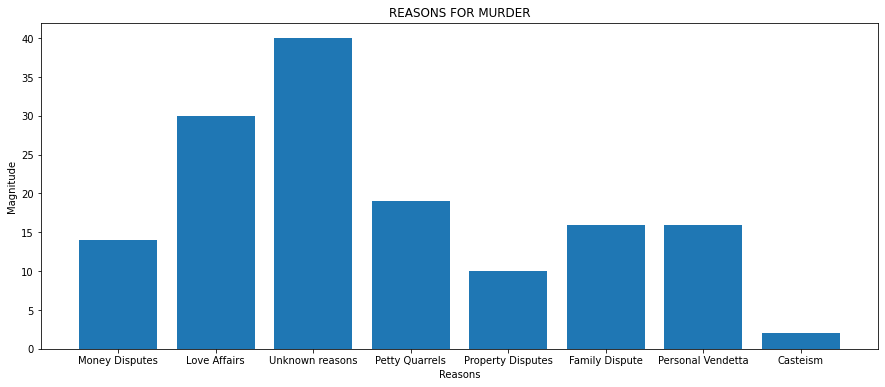

' From the graph we can see that the highest known reason for murder is Love affairs and the least known is casteism.'

In [9]:
plt.figure(figsize=(15,6))
plt.bar(keys,values)
plt.title("REASONS FOR MURDER")
plt.xlabel("Reasons")
plt.ylabel("Magnitude")
plt.show()
""" From the graph we can see that the highest known reason for murder is Love affairs and the least known is casteism."""

In [10]:
data

,City,Reasons For Murder,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women(Act),Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0


In [11]:
cities=data.iloc[:,0]
d={}
for x in cities:
    if(x in d):
        d[x]+=1
    else:
        d[x]=1
d
keys=list(d.keys())
values=list(d.values())
print(keys,values)

['Ghaziabad', 'Kanpur', 'Lucknow'] [167, 97, 202]


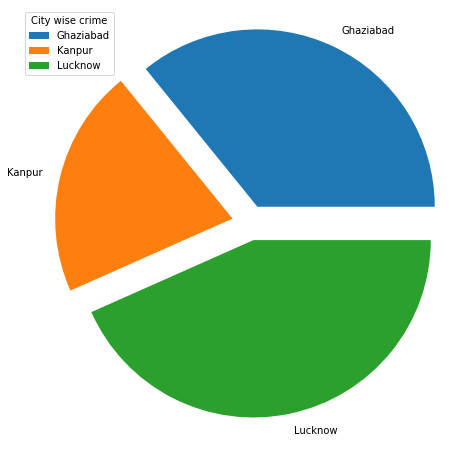

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.pie(values,labels=keys,explode=[0.1,0.1,0.1])
plt.legend(title="City wise crime")
plt.axis('equal')
plt.show()
# from the plot we can conclude that highest number of crime happens in the city of lucknow